# Assignment 2

#### Flight Delays Dataset

In [1]:
#importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
#Reading the data file
delay_df = pd.read_csv('FlightDelays.csv')

# Check data types and missing values
print(delay_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB
None


In [3]:
# Summary statistics
print(delay_df.describe())

       CRS_DEP_TIME     DEP_TIME     DISTANCE       FL_NUM      Weather  \
count   2201.000000  2201.000000  2201.000000  2201.000000  2201.000000   
mean    1371.938664  1369.298955   211.871422  3815.086324     0.014539   
std      432.697149   442.462754    13.316815  2409.750224     0.119725   
min      600.000000    10.000000   169.000000   746.000000     0.000000   
25%     1000.000000  1004.000000   213.000000  2156.000000     0.000000   
50%     1455.000000  1450.000000   214.000000  2385.000000     0.000000   
75%     1710.000000  1709.000000   214.000000  6155.000000     0.000000   
max     2130.000000  2330.000000   229.000000  7924.000000     1.000000   

          DAY_WEEK  DAY_OF_MONTH  
count  2201.000000   2201.000000  
mean      3.905498     16.024989  
std       1.903149      8.677390  
min       1.000000      1.000000  
25%       2.000000      8.000000  
50%       4.000000     16.000000  
75%       5.000000     23.000000  
max       7.000000     31.000000  


In [4]:
#Presenting the 10 data records

delay_df.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01/01/2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01/01/2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01/01/2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,01/01/2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,01/01/2004,7814,IAD,0,4,1,N685BR,ontime


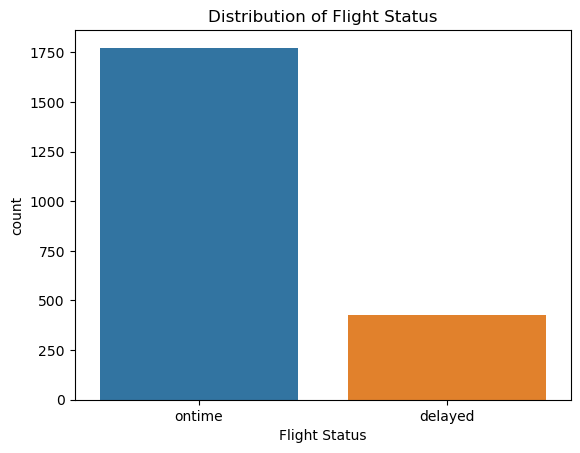

In [5]:
# Distribution of flight statuses
sns.countplot(x='Flight Status', data=delay_df)
plt.title('Distribution of Flight Status')
plt.show()

#### From the countplot above we can clearly see that most of the flights were on time and only about 400 flights were delayed.

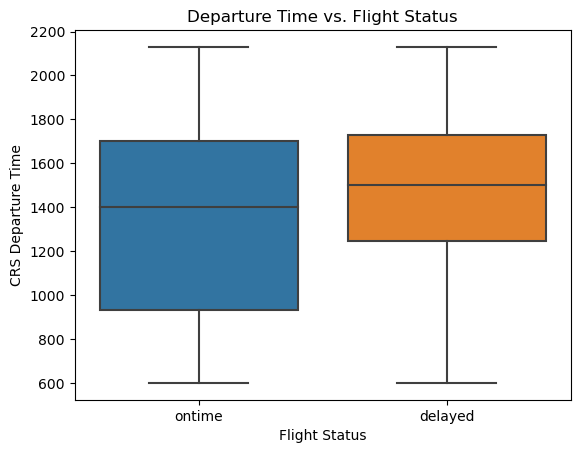

In [6]:
# Relationship between departure time and flight status
sns.boxplot(x='Flight Status', y='CRS_DEP_TIME', data=delay_df)
plt.title('Departure Time vs. Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('CRS Departure Time')
plt.show()

#### The boxplot depicts that; flights that took off around median value of 14:00 hrs were on time; but the flights which were delayed had departure median time of 15:00 hrs

In [7]:
# Calculate correlation matrix
correlation_matrix = delay_df.corr()

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'OH'

# Naive Bayes Classifier

#### Goal : To Predict flight status based on Departure time , Destination , Origin , Carrier and Day of the week

In [8]:
#Converting the Day_week column to Numerical data to Categorical values

delay_df.DAY_WEEK = delay_df.DAY_WEEK.astype('category')

In [9]:
#Creating hourly bins departure time

delay_df.CRS_DEP_TIME = [round(t/100) for t in delay_df.CRS_DEP_TIME]
delay_df.CRS_DEP_TIME = delay_df.CRS_DEP_TIME.astype('category')

In [10]:
#Splitting the data into Training and Testing Data

predictors = ['DAY_WEEK','CRS_DEP_TIME','ORIGIN','DEST','CARRIER']
outcome = 'Flight Status'

X = pd.get_dummies(delay_df[predictors])
y = delay_df['Flight Status']
classes = ['on time','delayed']

In [11]:
#Split the data into training and Validation

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.40,random_state=1)

In [450]:
#Running Naive Bayes

delay_nb = MultinomialNB(alpha=0.01)
delay_nb.fit(X_train,y_train)


MultinomialNB(alpha=0.01)

In [451]:
# predict probabilities (Shows the belonging probabilities of each record to which class)
predProb_train = delay_nb.predict_proba(X_train)
predProb_valid = delay_nb.predict_proba(X_valid)


In [452]:
# predict class membership (shows the class instead of probability by selecting the class with highest probability)
y_valid_pred = delay_nb.predict(X_valid)
y_train_pred = delay_nb.predict(X_train)

In [453]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_valid, y_valid_pred)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
classification_rep = classification_report(y_valid, y_valid_pred, zero_division=1)

print("Naive Bayes Classifier\n\n")
print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Naive Bayes Classifier


Accuracy: 0.78

Confusion Matrix:
[[ 26 141]
 [ 51 663]]

Classification Report:
              precision    recall  f1-score   support

     delayed       0.34      0.16      0.21       167
      ontime       0.82      0.93      0.87       714

    accuracy                           0.78       881
   macro avg       0.58      0.54      0.54       881
weighted avg       0.73      0.78      0.75       881



### Classifying a Atlantic Coast flight from Dulles to Kennedy departing between 3pm to 4pm on a Friday

In [454]:
#Using the model to predict a new data

df = pd.concat([pd.DataFrame({'actual':y_valid,'predicted':y_valid_pred})], axis=1)
mask = ((X_valid.CARRIER_DH==1) & (X_valid.DAY_WEEK_5 ==1) & (X_valid.CRS_DEP_TIME_15 ==1) & 
        (X_valid.DEST_JFK ==1) & (X_valid.ORIGIN_IAD ==1))

print(df[mask])

      actual predicted
1611  ontime   delayed
59    ontime   delayed
1089  ontime   delayed


# K- Nearest Neighbours Classifier

In [455]:
# finding value of K and it's accuracy
results = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
    'k': k,
    'accuracy': accuracy_score(y_valid, knn.predict(X_valid))
   })
 
 # Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

   k  accuracy
0  1  0.706016
1  2  0.617480
2  3  0.737798
3  4  0.724177
4  5  0.775255
5  6  0.748014
6  7  0.785471
7  8  0.769580
8  9  0.788876


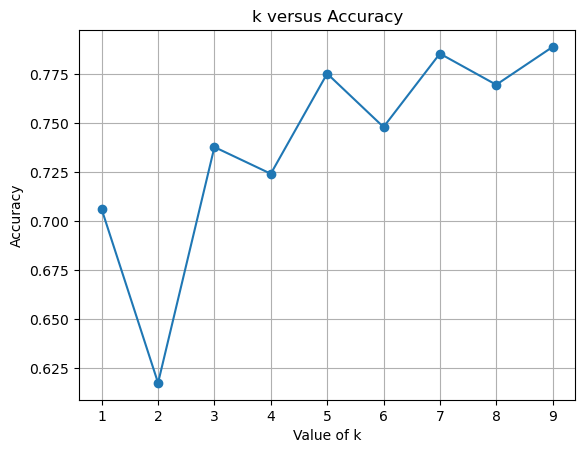

In [456]:
# Plot graph of k versus accuracy
plt.plot(results['k'], results['accuracy'], marker='o')
plt.title('k versus Accuracy')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

In [457]:
# Train a k-Nearest Neighbors (KNN) classifier
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [458]:
# predict class membership (shows the class instead of probability by selecting the class with highest probability)
y_valid_pred = knn_classifier.predict(X_valid)
y_train_pred = knn_classifier.predict(X_train)

In [459]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_valid, y_valid_pred)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
classification_rep = classification_report(y_valid, y_valid_pred, zero_division=1)

print("KNN Clasifier\n\n")
print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

KNN Clasifier


Accuracy: 0.78

Confusion Matrix:
[[ 21 146]
 [ 52 662]]

Classification Report:
              precision    recall  f1-score   support

     delayed       0.29      0.13      0.17       167
      ontime       0.82      0.93      0.87       714

    accuracy                           0.78       881
   macro avg       0.55      0.53      0.52       881
weighted avg       0.72      0.78      0.74       881



### Classifying a Atlantic Coast flight from Dulles to Kennedy departing between 3pm to 4pm on a Friday

In [460]:
df = pd.concat([pd.DataFrame({'actual':y_valid,'predicted':y_valid_pred})], axis=1)
mask = ((X_valid.CARRIER_DH==1) & (X_valid.DAY_WEEK_5 ==1) & (X_valid.CRS_DEP_TIME_15 ==1) & 
        (X_valid.DEST_JFK ==1) & (X_valid.ORIGIN_IAD ==1))

print(df[mask])

      actual predicted
1611  ontime    ontime
59    ontime    ontime
1089  ontime    ontime


# Random Forest Classifier

In [461]:
# Train Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=39)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=39)

In [462]:
# predict class membership (shows the class instead of probability by selecting the class with highest probability)
y_valid_pred = random_forest_classifier.predict(X_valid)
y_train_pred = random_forest_classifier.predict(X_train)

In [463]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_valid, y_valid_pred)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
classification_rep = classification_report(y_valid, y_valid_pred, zero_division=1)

print("Random Forest Clasifier\n\n")
print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Random Forest Clasifier


Accuracy: 0.75

Confusion Matrix:
[[ 32 135]
 [ 88 626]]

Classification Report:
              precision    recall  f1-score   support

     delayed       0.27      0.19      0.22       167
      ontime       0.82      0.88      0.85       714

    accuracy                           0.75       881
   macro avg       0.54      0.53      0.54       881
weighted avg       0.72      0.75      0.73       881



### Classifying a Atlantic Coast flight from Dulles to Kennedy departing between 3pm to 4pm on a Friday

In [464]:
#Using the model to predict a new data

df = pd.concat([pd.DataFrame({'actual':y_valid,'predicted':y_valid_pred})], axis=1)
mask = ((X_valid.CARRIER_DH==1) & (X_valid.DAY_WEEK_5 ==1) & (X_valid.CRS_DEP_TIME_15 ==1) & 
        (X_valid.DEST_JFK ==1) & (X_valid.ORIGIN_IAD ==1))

print(df[mask])

      actual predicted
1611  ontime    ontime
59    ontime    ontime
1089  ontime    ontime
